In [2]:
from pint.models import get_model_and_toas
from pint.logging import setup as setup_log
from pint.fitter import WLSFitter
from pint.utils import wavex_setup, dmwavex_setup, akaike_information_criterion

from copy import deepcopy
import numpy as np

/home/abhimanyu/miniconda3/envs/pint-noise/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
setup_log(level="WARNING")

1

In [4]:
m, t = get_model_and_toas("sim5.par", "sim5.tim")

In [5]:
Tspan = t.get_mjds().max() - t.get_mjds().min()

In [6]:
m.remove_component("PLRedNoise")
m.remove_component("PLDMNoise")

In [7]:
aics = np.zeros((46, 46))

In [14]:
for nharm_red in range(46):
    for nharm_dm in range(46):
        print(nharm_red, nharm_dm, end="\t")
    
        m1 = deepcopy(m)

        if nharm_red > 0:
            wavex_setup(m1, T_span=Tspan, n_freqs=nharm_red)
        if nharm_dm > 0:
            dmwavex_setup(m1, T_span=Tspan, n_freqs=nharm_dm)

        ftr = WLSFitter(t, m1)
        ftr.fit_toas(maxiter=10)

        aic = akaike_information_criterion(ftr.model, t)

        print(aic)

        aics[nharm_red, nharm_dm] = aic

0 0	-52341.197863249194793
0 1	-52620.187265483616002
0 2	-52638.889710342638185
0 3	-52666.841739337344688
0 4	-52666.583157048182215
0 5	-52664.398175186898754
0 6	-52667.891795386753984
0 7	-52671.734760177068953
0 8	-52672.74184344721954
0 9	-52671.11688693622797
0 10	-52667.810780387113983
0 11	-52667.750226270638144
0 12	-52664.255858636335706
0 13	-52661.438900100401334
0 14	-52658.228859515344226
0 15	-52656.506825408665442
0 16	-52656.107956318249297
0 17	-52652.368534843515615
0 18	-52650.583578124066786
0 19	-52648.152785984127078
0 20	-52646.36058238141858
0 21	-52643.43700313851747
0 22	-52640.63856448296582
0 23	-52637.20377324477175
0 24	-52633.4647503572834
0 25	-52630.588053189590088
0 26	-52630.401739330169175
0 27	-52630.847133122567335
0 28	-52629.182808392841963
0 29	-52626.79842432370357
0 30	-52623.27401654186616
0 31	-52620.6730211101414
0 32	-52623.23001705053569
0 33	-52621.401550658314054
0 34	-52618.16156083230188
0 35	-52615.062674736693236
0 36	-52613.1203

In [15]:
nharms_opt_red, nharms_opt_dm = np.unravel_index(np.argmin(aics), aics.shape)

In [16]:
from matplotlib import pyplot as plt

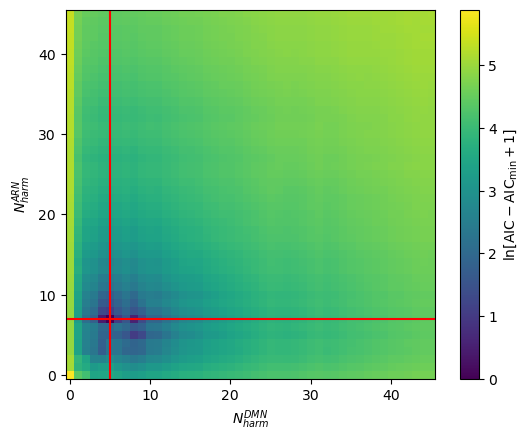

In [17]:
ims = plt.imshow(np.log(aics - aics.min() + 1), origin='lower')
plt.axvline(nharms_opt_dm, color="r")
plt.axhline(nharms_opt_red, color="r")
plt.xlabel("$N_{harm}^{DMN}$")
plt.ylabel("$N_{harm}^{ARN}$")
clb = plt.colorbar(ims)
clb.set_label("$\ln[{\\rm AIC} - {\\rm AIC}_{\min} + 1]$")
plt.savefig("sim5-aic.pdf")

In [8]:
m1 = deepcopy(m)

wavex_setup(m1, T_span=Tspan, n_freqs=7)
dmwavex_setup(m1, T_span=Tspan, n_freqs=5)

ftr = WLSFitter(t, m1)
ftr.fit_toas(maxiter=10)

ftr.model.write_parfile("sim5.wx.par")

In [23]:
nharms_opt_red, nharms_opt_dm

(7, 5)